# Jit Particle

In [1]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

In [2]:
class Point():
    """    
    Arguments:
        domain: the domain of random generated coordinates x,y,z, 
                default=1.0
    
    Attributes:
        x, y, z: coordinates of the point
    """
    def __init__(self, domain=1.0):
        self.x = domain * np.random.random()
        self.y = domain * np.random.random()
        self.z = domain * np.random.random()
            
    def distance(self, other):
        return ((self.x - other.x)**2 + 
                (self.y - other.y)**2 + 
                (self.z - other.z)**2)**.5

In [3]:
class Particle(Point):
    """    
    Attributes:
        m: mass of the particle
        phi: the potential of the particle
    """
    
    def __init__(self, domain=1.0, m=1.0):
        Point.__init__(self, domain)
        self.m = m
        self.phi = 0.

In [4]:
def direct_sum(particles):
    """
    Calculate the potential at each particle
    using direct summation method.

    Arguments:
        particles: the list of particles

    """
    for i, target in enumerate(particles):
        for source in (particles[:i] + particles[i+1:]):
            r = target.distance(source)
            target.phi += source.m / r

In [5]:
particle_dtype = np.dtype({'names':['x','y','z','m','phi'], 
                             'formats':[np.double, 
                                        np.double, 
                                        np.double, 
                                        np.double, 
                                        np.double]})

Write a function `create_n_random_particles` that takes the arguments `n` (number of particles), `m` (mass of every particle) and a domain within to generate a random number (as in the class above).
It should create an array with `n` elements and `dtype=particle_dtype` and then return that array.

For each particle, the mass should be initialized to the value of `m` and the potential `phi` initialized to zero.

For the `x` component of a given particle `p`, you might do something like

```python
p['x'] = domain * numpy.random.random()
```

In [6]:
@njit
def create_n_random_particles(n, m, domain=1):
    '''
    Creates `n` particles with mass `m` with random coordinates
    between 0 and `domain`
    '''
    parts = np.zeros((n), dtype=particle_dtype)

    for p in parts:
        p['m'] = m
        p['phi'] = 0.
        p['x'] = domain * np.random.random()
        p['y'] = domain * np.random.random()
        p['z'] = domain * np.random.random()
        
    return parts   #parts is an array of particles

In [7]:
parts = create_n_random_particles(1000, .001, 1)

Write a JITted function `distance` to calculate the distance between two particles of dtype `particle_dtype`

Here's the `distance` method from the `Particle` class as a reference:

```python
def distance(self, other):
        return ((self.x - other.x)**2 + 
                (self.y - other.y)**2 + 
                (self.z - other.z)**2)**.5
```

In [8]:
@njit
def distance(part1, part2):
    '''calculate the distance between two particles'''
    return ((part1['x'] - part2['x'])**2 + 
            (part1['y'] - part2['y'])**2 + 
            (part1['z'] - part2['z'])**2)**.5

In [9]:
distance(parts[0], parts[1])

0.8196579574966638

Modify the original `direct_sum` function (copied below for reference) to instead work a NumPy array of particles.  Loop over each element in the array and calculate its total potential.

In [10]:
@njit
def direct_sum_np(particles):
    indexes = np.arange(len(particles))
    for i, target in enumerate(particles):
        for source in particles[indexes != i]:
            r = distance(target, source)
            target['phi'] += source['m'] / r

In [11]:
direct_sum_np(parts)

## Graph

In [12]:
array_of_sizes = np.arange(100, 2001, 100)

In [13]:
time_arr = np.zeros(array_of_sizes.size)
time_arr_np = np.zeros(array_of_sizes.size)
for i, size in enumerate(array_of_sizes):
    print(f'\r{i+1}/{array_of_sizes.size}', end='')
    parts = [Particle(m=1) for _ in range(size)]
    parts_np = create_n_random_particles(size, .001, 1)
    
    time = %timeit -o -q -r 3 -n 5 direct_sum(parts)
    time_arr[i] = time.best
    
    time = %timeit -o -q -r 3 -n 5 direct_sum_np(parts_np)
    time_arr_np[i] = time.best

20/20

Text(0, 0.5, 'Computation time')

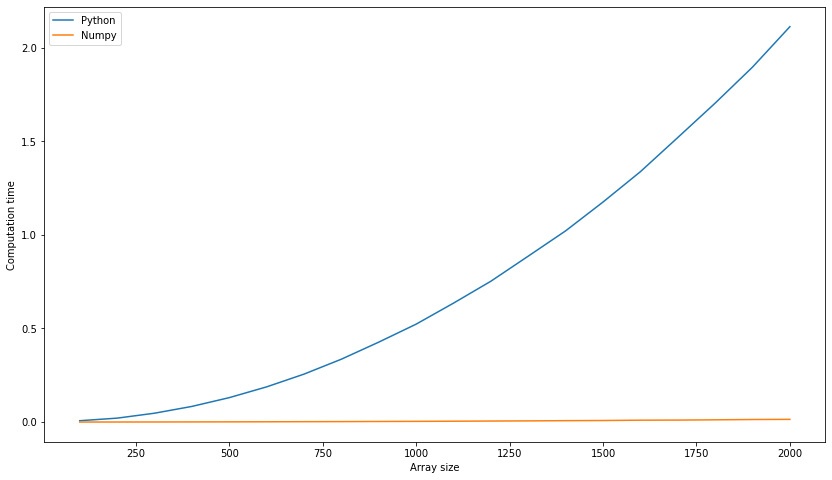

In [14]:
plt.figure(figsize=(14, 8))
plt.plot(array_of_sizes, time_arr, label='Python')
plt.plot(array_of_sizes, time_arr_np, label='Numpy')
plt.legend()
plt.xlabel('Array size')
plt.ylabel('Computation time')

Text(0, 0.5, 'Computation time')

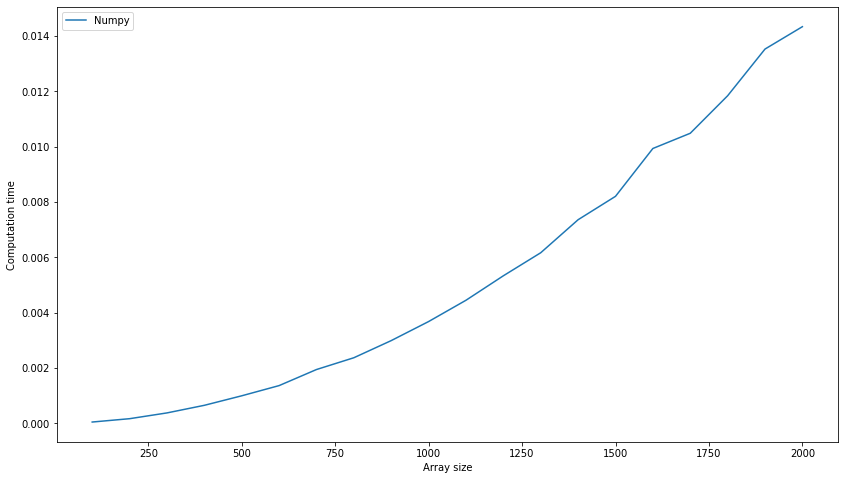

In [15]:
plt.figure(figsize=(14, 8))
plt.plot(array_of_sizes, time_arr_np, label='Numpy')
plt.legend()
plt.xlabel('Array size')
plt.ylabel('Computation time')